# Eine kleine Noncemusik
Noncesense Research Lab / Monero Archival Project

Feb 2019

Turning the time-dependent nonce distribution into music.

# Contributors
[NeptuneResearch](https://github.com/neptuneresearch),  [Isthmus](https://github.com/mitchellpkt)


Take a peek at the nonces

## Import libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import mlab
import matplotlib.pyplot as plt
from scipy.stats import norm
import random
import matplotlib.patches as patches
from copy import copy

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Import data Nonce

In [4]:
df= pd.read_csv("../data/Blocks_alt_and_main_20190418.csv")
df.describe()

,node_id,archive_version,nrt,deltart,height,nonce
count,399522.000000,399522.000000,3.995220e+05,3.995220e+05,3.995220e+05,3.995220e+05
mean,3.238405,7.338712,1.540013e+12,4.812506e+06,1.646660e+06,9.112473e+08
std,0.674100,0.920366,4.279853e+09,4.685442e+06,5.955291e+04,1.288809e+09
min,1.000000,6.000000,1.535361e+12,-2.290000e+02,1.546000e+06,0.000000e+00
25%,3.000000,6.000000,1.535376e+12,1.419298e+05,1.595862e+06,8.877600e+04
50%,3.000000,8.000000,1.539441e+12,3.731542e+06,1.645792e+06,5.374510e+06
75%,4.000000,8.000000,1.540748e+12,8.301452e+06,1.692758e+06,1.718002e+09
max,4.000000,8.000000,1.549944e+12,2.045360e+07,1.769554e+06,4.294648e+09


## Plot the distribution of nonce values

Inspired by:

__Antoine Le Calvez__

@khannib https://twitter.com/khannib/status/1082280569449447424

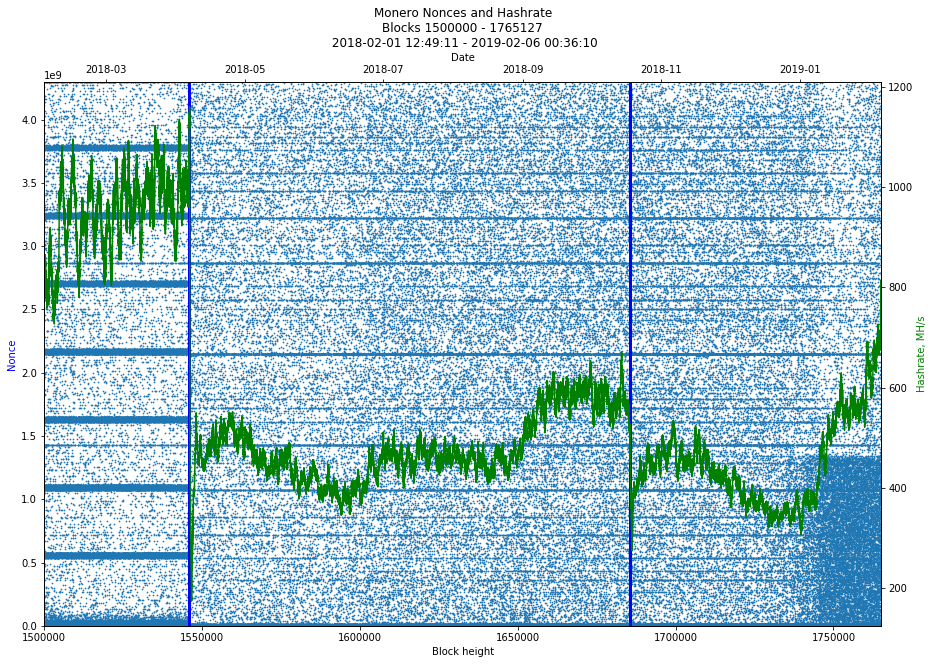

In [6]:
import datetime
plot_alts = 0
data = pd.read_csv("../data/nonce-difficulty-1500000.csv")

pow_v7_fork_height = 1546000
pow_v8_fork_height = 1685555
block_time_sec = 120

block_start = min(data.height)
block_end = max(data.height)
date_start = datetime.datetime.utcfromtimestamp(min(data.timestamp))
date_end = datetime.datetime.utcfromtimestamp(max(data.timestamp))

fig, ax = plt.subplots(figsize=(15, 10))
if plot_alts != 1:
    plt.scatter(data.height, data.nonce, s=0.5)
if plot_alts:
    color_att = 0.8
    tr_main = plt.scatter(data.height, data.nonce, c=(color_att,color_att,color_att), s=0.6)
    tr_alt = plt.scatter(alt_df.height, alt_df.nonce, c='r', s=6)
plt.title('Monero Nonces and Hashrate\nBlocks {} - {}\n {} - {}'.format(block_start, block_end, date_start, date_end))
plt.xlabel('Block height')
plt.ylabel('Nonce', color='blue')
plt.axvline(x=pow_v7_fork_height, c='blue', linewidth=3)
plt.axvline(x=pow_v8_fork_height, c='blue', linewidth=3)
ax.set_xlim(block_start, block_end)
ax.set_ylim(0, 2**32)

ax2 = ax.twinx()
hashrate_mh_s = data.difficulty*1e-6/block_time_sec
tr_hash = ax2.plot(data.height, hashrate_mh_s, 'green')
ax2.set_ylabel('Hashrate, MH/s', color='green')

ax3 = ax.twiny()
ax3.set_xlabel("Date")
ax3.set_xlim(date_start, date_end)

# plt.legend([tr_main, tr_alt, tr_hash],['Block nonce (main chain)','Block nonce (alt chain)','Total hashrate'],)

plt.show()

Let's get a 2D histogram behind this for clarity. Snagging code from https://plot.ly/python/2D-Histogram/

In [28]:
## Sort the list
#nonce_subset = [int(x) for x in subset]
#nonce_subset.sort(key=int)
#ln = len(nonce_subset)

#start_wrap = int(4100000)
#wrap_window = int(300000)
#std_dev_record = np.zeros(wrap_window-1)
#c = 0

#for wrap in range(start_wrap, start_wrap + wrap_window-1):
#    wrapped_data = [np.mod(x,wrap) for x in nonce_subset]
#    std_dev = np.std(np.mod(nonce_subset, wrapped_data))
#    std_dev_record[c] = std_dev
#    c = c + 1

# plt.scatter(range(len(std_dev_record)), std_dev_record)
# min_std = min(std_dev_record)
# [i for i, j in enumerate(std_dev_record) if j == min_std]

## Alt block research

(incomplete code, sparse documentation)

NRT = Node receipt time (cannot be spoofed)

MRT = Miner-reported time (can be spoofed, is often wrong)

Notes:

-  11:56 [Isthmus] e.g. suppose chains A and B. If we receive A1@t=0s, B1@t=1s, B2@t=130s, then it was demonstrably not a selfish miner.
-  11:57 If we receive A1@t=0s, B1@t=118s, B2@t=119s, that is *extremely* suggestive (effectively conclusive) of selfish mining
-  11:59 Here's report/documentation for a reorg we observed, exhibiting characteristics of the latter example:
-  11:59 https://github.com/Mitchellpkt/monero_archival_project/wiki/Selfish-mining-at-1636647
-  12:00 [moneromooo] I'd think... record receive time minus block timestamp. Check distribution of that in orphaned blocks and orphaning blocks.
-  12:01 It doesn't necessarily help, since it's kinda of a self selection thing though: a party which does selfish mining might have their own update code.
-  14:22 [Isthmus] Cool, I might start with comparing the node receipt timestamps (which cannot be spoofed) for two blocks that started the fork 
-  14:22 i.e. A1 and B1, using the notation from above
-  14:23 for example, noting 3 cases: 
-  14:23 abs(A1-B1)<1 seconds, probably just latency-induced
-  14:24 100 s < abs(A1-B1) < 200 s, probably intentional block withholding
-  14:25 abs(A1-B1) > 10000 s, not competitive, nothing to be worried about, probably a glitch
-  14:27 s/probably intentional/maybe intentional/ 
-  14:28 The assessment is upgraded to "probably intentional" depending on the magnitude and sign of (B2-B1)
-  14:29 I've seen cases where B2-B1 is actually negative, which is a smoking gun for selfish mining
-  14:29 Then small positive B2-B1 is suggestive of selfish mining

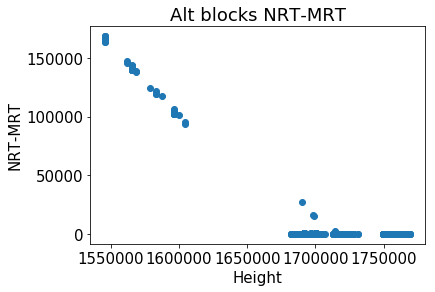

In [29]:
plt.scatter(alt_df.height, alt_df.deltart/100)
plt.title('Alt blocks NRT-MRT');
plt.ylabel('NRT-MRT');
plt.xlabel('Height');

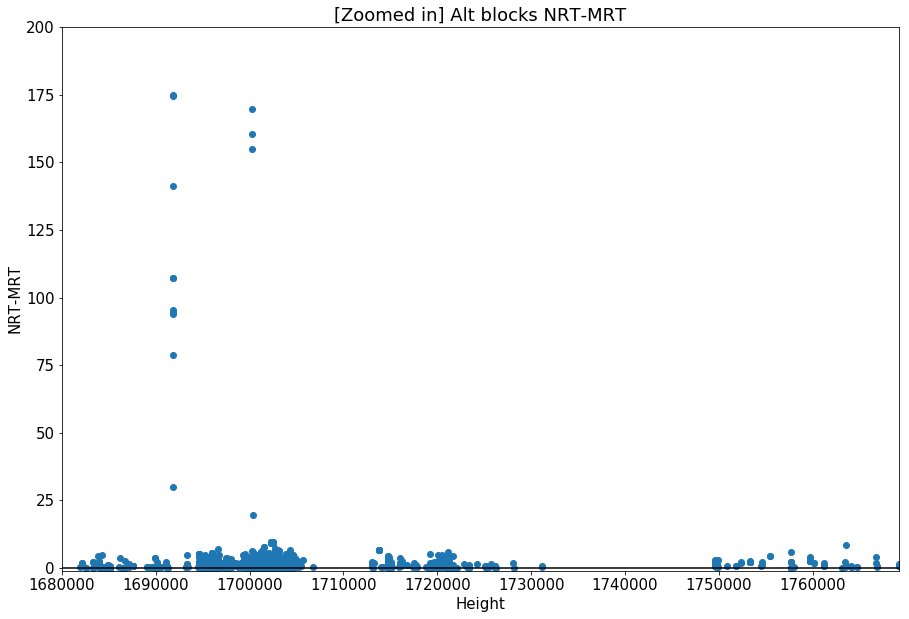

In [30]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.scatter(alt_df.height, alt_df.deltart/100)
plt.xlim([1680000, max(alt_df.height)])
plt.ylim([-1, 200])
ax.axhline(0,c='k')
plt.title('[Zoomed in] Alt blocks NRT-MRT');
plt.ylabel('NRT-MRT');
plt.xlabel('Height');

Each time there is a fork, compare the node receipt timestamps from both sides. (Want to only compare the *first* time a block was received; subsequent copies are not informative for the scope of this subproject)

(736726.5341550926, 737096.0251157407)

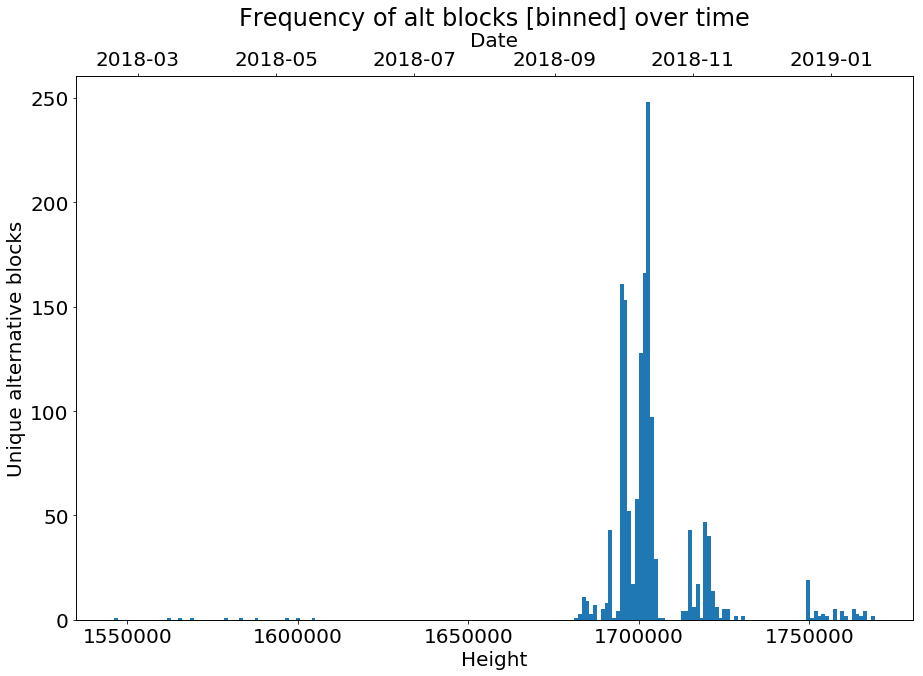

In [31]:
# Pull out unique list of heights that had alternate blocks
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(figsize=(15, 10))
alt_heights = np.unique(alt_df.height)
plt.hist(alt_heights,bins=200);
plt.ylabel('Unique alternative blocks');
plt.xlabel('Height');
plt.title('Frequency of alt blocks [binned] over time')
ax3 = ax.twiny()
ax3.set_xlabel("Date")
ax3.set_xlim(date_start, date_end)
#plt.xlim((1680000, max(alt_heights)))

(736726.5341550926, 737096.0251157407)

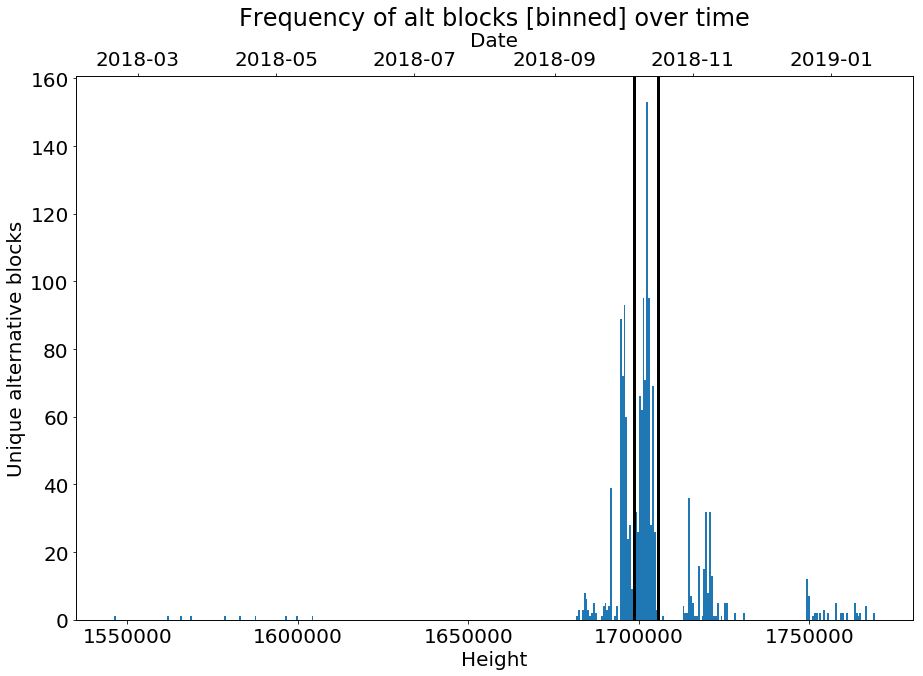

In [32]:
# Pull out unique list of heights that had alternate blocks
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(figsize=(15, 10))
alt_heights = np.unique(alt_df.height)
center_height = 1700000 + 2000
window_width = 3500 #7000
event_heights = [h for h in alt_heights if h > center_height-window_width and h < center_height+window_width]
nbins_raw = 400 #200
plt.hist(alt_heights,bins=nbins_raw);
plt.axvline(x=center_height-window_width, c='k', linewidth=3)
plt.axvline(x=center_height+window_width, c='k', linewidth=3)
plt.ylabel('Unique alternative blocks');
plt.xlabel('Height');
plt.title('Frequency of alt blocks [binned] over time')
ax3 = ax.twiny()
ax3.set_xlabel("Date")
ax3.set_xlim(date_start, date_end)

#plt.xlim((1680000, max(alt_heights)))

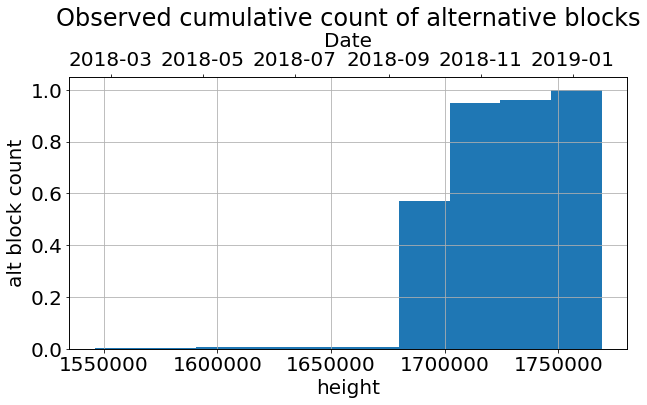

In [33]:
fig, ax = plt.subplots(figsize=(10, 5))

# plot the cumulative histogram
n, bins, patches = ax.hist(alt_heights, density=1, histtype='stepfilled',
                           cumulative=True)

ax.grid(True)
ax.set_title('Observed cumulative count of alternative blocks')
ax.set_xlabel('height')
ax.set_ylabel('alt block count')
ax.set_xscale('linear')
ax3 = ax.twiny()
ax3.set_xlabel("Date")
ax3.set_xlim(date_start, date_end)

plt.show()

In [34]:
print("Number of alt blocks: " + str(len(alt_heights)))
print("Sub window contains: " + str(len(event_heights)) + " alt blocks")
print("Sub window contains: " + str(2*window_width) + " alt blocks")
print("Ratio: " + str(len(event_heights)/(2*window_width)) + " alt blocks")

Number of alt blocks: 1471
Sub window contains: 731 alt blocks
Sub window contains: 7000 alt blocks
Ratio: 0.10442857142857143 alt blocks


In [35]:
alt_heights_sorted = np.sort(alt_heights)
alt_block_dists =  alt_heights[2:len(alt_heights_sorted)] - alt_heights[1:len(alt_heights_sorted)-1]
small_alt_block_dists = [a for a in alt_block_dists if abs(a) <= 10]
alt_heights_sorted

array([1546000, 1562061, 1565690, ..., 1766882, 1769184, 1769185])

Text(0.5, 1.0, 'Consecutive alternative blocks')

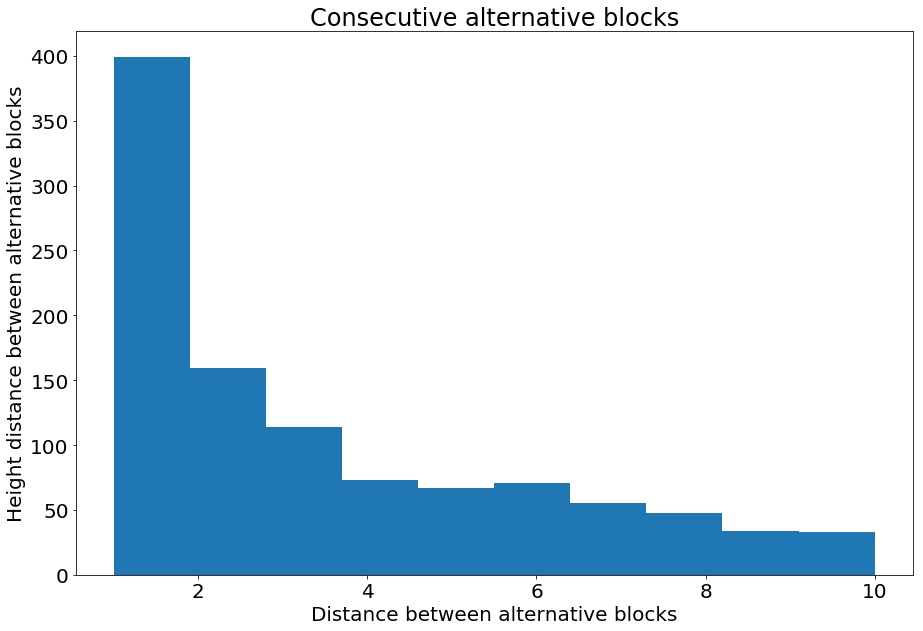

In [36]:
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(figsize=(15, 10))
plt.hist(small_alt_block_dists, bins=10);
plt.ylabel('Height distance between alternative blocks');
plt.xlabel('Distance between alternative blocks');
plt.title('Consecutive alternative blocks')

In [37]:
# Initialize data frame

block_df = pd.DataFrame()
block_df['height'] = alt_heights_sorted
block_df['terminal_block']= 0 # is this the last block in the alt-chain?
block_df['nth_in_chain']= 0 # is this the last block in the alt-chain?
block_df['alt_chain_ID'] = 0

# Feature engineering

block_df['interblock_dist'] = block_df['height']-block_df['height'].shift() # how long did this alt-chain get?
block_df = block_df.reset_index()
block_df.drop(['index'], 1, inplace=True)
block_df.loc[0,('alt_chain_length')] = 1 # since we don't know what preceded

#block_df.loc[block_df.delta_time.isnull(),('alt_chain_length')] = 1 # first block in chain
block_df.head(20)
#block_df[block_df['interblock_dist']==1]


alt_chain_counter = 0
increment_next = 0

# Loop over rows = blocks
for index, row in block_df.iterrows():
    if index < len(block_df) -1 :
        
        if block_df.loc[index+1,('height')] - block_df.loc[index,('height')] == 1:
            if increment_next:
                alt_chain_counter = alt_chain_counter + 1
                nth_in_chain = 1
                # block_df.loc[index,('first_block')] = 1
            else:
                nth_in_chain = nth_in_chain + 1
            block_df.loc[index,('nth_in_chain')] = nth_in_chain
            block_df.loc[index+1,('nth_in_chain')] = nth_in_chain + 1 # next one is in the same chain
            block_df.loc[index,('alt_chain_ID')] = alt_chain_counter
            block_df.loc[index+1,('alt_chain_ID')] = alt_chain_counter
            increment_next = 0
            
            # Next one is the terminal block, this one is not
            block_df.loc[index+1,('terminal_block')] = 1
            block_df.loc[index,('terminal_block')] = 0


        else:
            increment_next = 1
            # block_df.loc[index,('nth_in_chain')] = 0
            # block_df.loc[index,('alt_chain_ID')] = 0


chain_len_dict = dict()

for i in range(1,max(block_df.alt_chain_ID)):
    sub_bdf = block_df[block_df['alt_chain_ID']==i]
    chain_len_dict[str(i)] = max(sub_bdf.nth_in_chain)
    
                
for index, row in block_df.iterrows():
    a = block_df.loc[index,('alt_chain_ID')]
    if a > 0 and a < np.max(block_df.alt_chain_ID):
        block_df.loc[index,('alt_chain_length')] = chain_len_dict[str(a)]

#block_df.head(20)
#block_df[block_df['interblock_dist']==1]
block_df.head(20)


,height,terminal_block,nth_in_chain,alt_chain_ID,interblock_dist,alt_chain_length
0,1546000,0,0,0,NaN,1.0
1,1562061,0,0,0,16061.0,NaN
2,1565690,0,0,0,3629.0,NaN
3,1568536,0,0,0,2846.0,NaN
4,1578847,0,0,0,10311.0,NaN
5,1583266,0,0,0,4419.0,NaN
6,1587293,0,0,0,4027.0,NaN
7,1596549,0,0,0,9256.0,NaN
8,1599986,0,0,0,3437.0,NaN
9,1604268,0,0,0,4282.0,NaN


(0, 10)

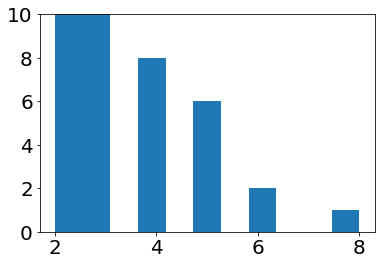

In [38]:
# Pull out just the terminal blocks to represent each chain
term_df = block_df[block_df['terminal_block']==1]
alt_chain_lengths = term_df['alt_chain_length']
max_len = 10
small_alt_chain_lengths = [a for a in alt_chain_lengths if a < max_len]
# KEEPING ONLY THE SMALL ONES 
plt.hist(small_alt_chain_lengths,bins = max_len+1)
plt.ylim([0, 10])

In [39]:
# Pull in new big data set

v4df = pd.read_csv("./data/Blocks_alt_and_main_20190418.csv")
v4df_main = copy(v4df[v4df['is_alt_block']==0])
v4df_main.head()

v4df_alt = copy(v4df[v4df['is_alt_block']==1])
v4df_alt.head()

,node_id,archive_version,nrt,deltart,height,is_alt_block,nonce
1,4,6,1536839031944,13835981,1546000,True,570430823
2,4,6,1537742299011,14739249,1546000,True,570430823
3,4,7,1538366763712,15363713,1546000,True,570430823
4,4,7,1539305370105,16302320,1546000,True,570430823
5,2,8,1539408116485,16405066,1546000,True,570430823


In [41]:
# Now let's pull out the first blocks
fb_df = copy(block_df[block_df['nth_in_chain']==1])
fb_df.alt_nrt_0 = 0

# Feature engineering again
for index, row in fb_df.iterrows():
    this_height = fb_df.loc[index,('height')]
    
    # Collect first alt block timestamp
    sub_alt_df = alt_df_all[alt_df_all['height'] == this_height]
    first_nrt = np.min(sub_alt_df.nrt)/100
    fb_df.loc[index,('alt_nrt_0')] = first_nrt
    
    # Collect first main block timestamp
    sub_main_df = v4df_main[v4df_main['height'] == this_height]
    first_nrt_main = np.min(sub_main_df.nrt)/100
    fb_df.loc[index,('main_nrt_0')] = first_nrt_main
    
# How long did the alt block lag?
fb_df['alt_lag_s'] = (fb_df['alt_nrt_0'] - fb_df['main_nrt_0'])/1e3

In [42]:
fb_df.describe()

,height,terminal_block,nth_in_chain,alt_chain_ID,interblock_dist,alt_chain_length,alt_nrt_0,main_nrt_0,alt_lag_s
count,2.500000e+02,250.0,250.0,250.000000,250.000000,249.000000,2.500000e+02,2.500000e+02,250.000000
mean,1.704726e+06,0.0,1.0,125.500000,83.408000,2.598394,1.542182e+10,1.543905e+10,-17235.670774
std,1.741315e+04,0.0,0.0,72.312977,269.955346,2.404498,2.088301e+07,3.242447e+07,25364.787456
min,1.683293e+06,0.0,1.0,1.000000,2.000000,2.000000,1.539589e+10,1.539589e+10,-56538.477760
25%,1.696013e+06,0.0,1.0,63.250000,3.000000,2.000000,1.541133e+10,1.541133e+10,-54188.876370
50%,1.701427e+06,0.0,1.0,125.500000,6.000000,2.000000,1.541784e+10,1.541784e+10,0.007235
75%,1.702937e+06,0.0,1.0,187.750000,15.750000,3.000000,1.541966e+10,1.547535e+10,0.022455
max,1.769184e+06,0.0,1.0,250.000000,2302.000000,36.000000,1.549898e+10,1.549898e+10,1072.798420


Text(0.5, 0, 'alt_NRT - main_NRT')

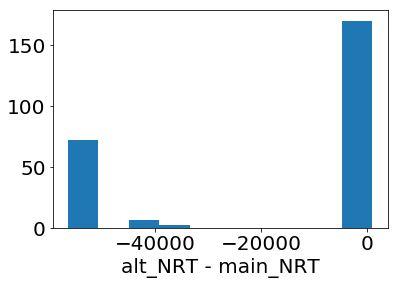

In [45]:
plt.hist(fb_df.alt_lag_s)
plt.xlabel('alt_NRT - main_NRT')

Text(0, 0.5, 'alt_NRT - main_NRT')

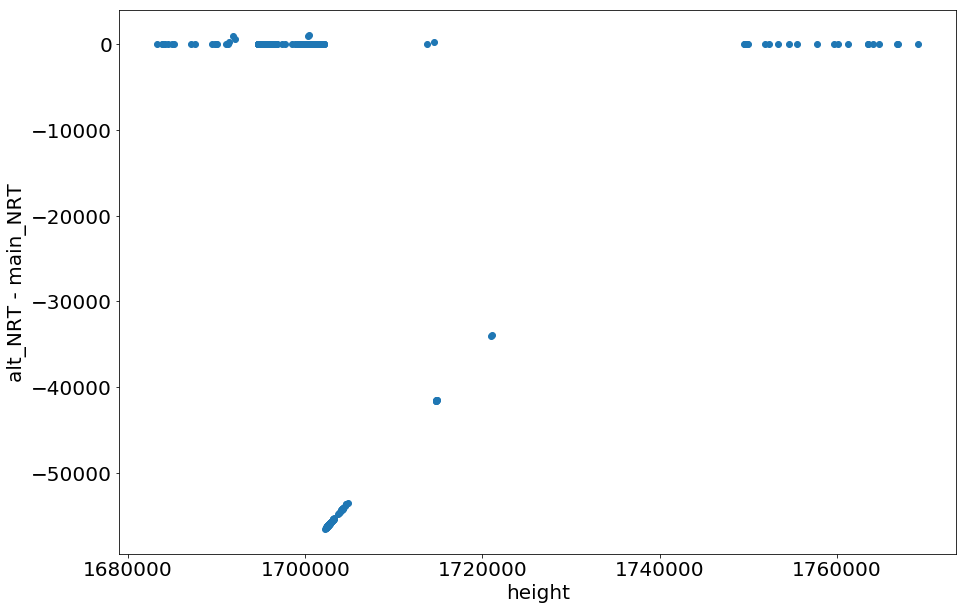

In [48]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.scatter(fb_df.height, fb_df.alt_lag_s)
plt.xlabel('height')
plt.ylabel('alt_NRT - main_NRT')

In [49]:
small_lags = [x for x in fb_df.alt_lag_s if abs(x)<500]

Text(0, 0.5, 'Occurrences')

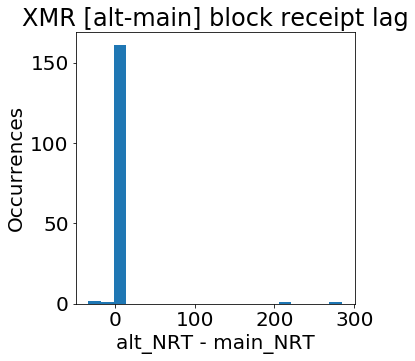

In [63]:
fig, ax = plt.subplots(figsize=(5,5))
plt.hist(small_lags, bins = 20)
plt.title('XMR [alt-main] block receipt lag')
plt.xlabel('alt_NRT - main_NRT')
plt.ylabel('Occurrences')